In [25]:
# csvを読み込む
import pandas as pd

# CSVファイルをデータフレームとして読み込む
df = pd.read_csv('/home/eevee/social-lstm/thor-magni/tm_png/Scenario_1/train/Magni_120522_SC1A_R1.csv')

# 読み込んだデータを確認
print(df.head())  # データの最初の5行を表示


   frame_id  ag_id         x         y         z  G3D_X  G3D_Y  G3D_Z
0         1      1 -7991.089 -1329.348  1879.879    NaN    NaN    NaN
1         1      6  -850.613 -3715.043  1644.423    NaN    NaN    NaN
2         1      9 -6637.344  2588.899  1775.901    NaN    NaN    NaN
3         1      3       NaN       NaN       NaN    NaN    NaN    NaN
4         1      5 -7022.621 -2826.469  1893.138    NaN    NaN    NaN


In [26]:
# ag_idでframe_idごとにソート
df = df.sort_values(['ag_id', 'frame_id'])


print(df.head())
print(df.tail())

    frame_id  ag_id          x         y         z  G3D_X  G3D_Y  G3D_Z
8          1      0 -4233.2280 -779.3570  692.5710    NaN    NaN    NaN
14         2      0 -4232.9330 -779.3045  692.5475    NaN    NaN    NaN
26         3      0 -4232.5655 -779.2640  692.5365    NaN    NaN    NaN
31         4      0 -4232.4945 -779.2670  692.5775    NaN    NaN    NaN
41         5      0 -4232.5290 -779.2450  692.5785    NaN    NaN    NaN
      frame_id  ag_id          x          y          z  G3D_X  G3D_Y  G3D_Z
5977       598      9  -714.3915 -3892.6710  1529.5210    NaN    NaN    NaN
5989       599      9  -698.2760 -3878.9480  1525.3130    NaN    NaN    NaN
5990       600      9  -708.7990 -3747.1860  1655.1585    NaN    NaN    NaN
6001       601      9  -856.4500 -3500.4125  1871.5615    NaN    NaN    NaN
6014       602      9 -1033.9655 -3242.8070  1968.3235    NaN    NaN    NaN


    frame_id  ag_id          x         y         z  G3D_X  G3D_Y  G3D_Z
8          1      0 -4233.2280 -779.3570  692.5710    0.0    0.0    0.0
14         2      0 -4232.9330 -779.3045  692.5475    0.0    0.0    0.0
26         3      0 -4232.5655 -779.2640  692.5365    0.0    0.0    0.0
31         4      0 -4232.4945 -779.2670  692.5775    0.0    0.0    0.0
41         5      0 -4232.5290 -779.2450  692.5785    0.0    0.0    0.0
      frame_id  ag_id          x          y          z  G3D_X  G3D_Y  G3D_Z
5977       598      9  -714.3915 -3892.6710  1529.5210    0.0    0.0    0.0
5989       599      9  -698.2760 -3878.9480  1525.3130    0.0    0.0    0.0
5990       600      9  -708.7990 -3747.1860  1655.1585    0.0    0.0    0.0
6001       601      9  -856.4500 -3500.4125  1871.5615    0.0    0.0    0.0
6014       602      9 -1033.9655 -3242.8070  1968.3235    0.0    0.0    0.0


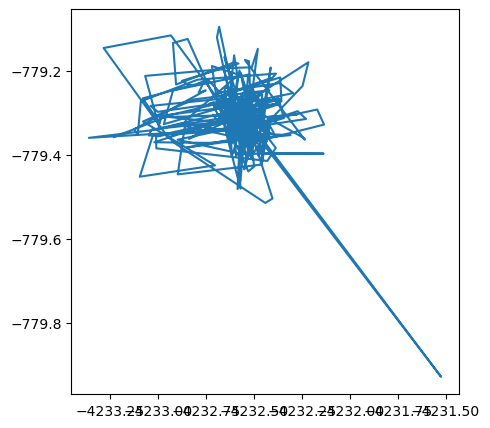

In [27]:
# `G3D_X`, `G3D_Y`, `G3D_Z`が存在しない場合は、0で埋める
df['G3D_X'] = df['G3D_X'].fillna(0)
df['G3D_Y'] = df['G3D_Y'].fillna(0)
df['G3D_Z'] = df['G3D_Z'].fillna(0)

# 補間処理を行う関数を定義
def interpolate_group(df_group):
    df_group['G3D_X'] = df_group['G3D_X'].interpolate(method='linear', limit_direction='both')
    df_group['G3D_Y'] = df_group['G3D_Y'].interpolate(method='linear', limit_direction='both')
    df_group['G3D_Z'] = df_group['G3D_Z'].interpolate(method='linear', limit_direction='both')
    # `x`, `y`, `z`の補間
    df_group['x'] = df_group['x'].interpolate(method='linear', limit_direction='both')
    df_group['y'] = df_group['y'].interpolate(method='linear', limit_direction='both')
    df_group['z'] = df_group['z'].interpolate(method='linear', limit_direction='both')
    return df_group



# ag_idごとにグループ化し、補間を適用
df_interpolated = df.groupby('ag_id').apply(interpolate_group)

df['x'] = df['x'].fillna(0)
df['y'] = df['y'].fillna(0)
df['z'] = df['z'].fillna(0)

# 補間後のデータを確認
print(df_interpolated.head())
print(df_interpolated.tail())

# 特定のag_id可視化
import matplotlib.pyplot as plt

idx = 0
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(df_interpolated[df_interpolated['ag_id'] == idx]['x'], df_interpolated[df_interpolated['ag_id'] == idx]['y'], label='ag_id=1')

# # csvとして保存
# output_file = '/home/eevee/social-lstm/thor-magni/tm_png/Scenario_1/train/20241014_Magni_120522_SC1A_R1.csv'
# df_interpolated.to_csv(output_file, index=False)
# print('Saved to', output_file)

In [29]:
# すべての行に対して、frame_idが20ごとにag_idに10を足していく
df_interpolated['modified_ag_id'] = df_interpolated['ag_id'] + ((df_interpolated['frame_id']-1) // 20) * 10

# 列の順序を指定した順に並べ替える
columns_order = ['frame_id', 'modified_ag_id', 'ag_id', 'x', 'y', 'z', 'G3D_X', 'G3D_Y', 'G3D_Z']
df_interpolated = df_interpolated[columns_order]
df_interpolated = df_interpolated.sort_values(['modified_ag_id', 'frame_id'])

print(df_interpolated.head())

# csvとして保存
output_file = '/home/eevee/social-lstm/thor-magni/tm_png/Scenario_1/train/20241014_Magni_120522_SC1A_R1.csv'
df_interpolated.to_csv(output_file, index=False)
print('Saved to', output_file)

    frame_id  modified_ag_id  ag_id          x         y         z  G3D_X  \
8          1               0      0 -4233.2280 -779.3570  692.5710    0.0   
14         2               0      0 -4232.9330 -779.3045  692.5475    0.0   
26         3               0      0 -4232.5655 -779.2640  692.5365    0.0   
31         4               0      0 -4232.4945 -779.2670  692.5775    0.0   
41         5               0      0 -4232.5290 -779.2450  692.5785    0.0   

    G3D_Y  G3D_Z  
8     0.0    0.0  
14    0.0    0.0  
26    0.0    0.0  
31    0.0    0.0  
41    0.0    0.0  
Saved to /home/eevee/social-lstm/thor-magni/tm_png/Scenario_1/train/20241014_Magni_120522_SC1A_R1.csv
